In [ ]:
import warnings
warnings.filterwarnings('ignore')

warnings.filterwarnings('ignore', 'This pattern has match groups')
warnings.filterwarnings('ignore', 'The iterable function was deprecated in Matplotlib')

In [ ]:
import pandas as pd
import numpy as np
# 기존 plotnine(ggplot)코드를 pandas와 seaborn으로 변경
# from plotnine import *
import seaborn as sns
# 지도 시각화를 위해
import folium

# 노트북 안에서 그래프를 표시하기 위해
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
# Window 의 한글 폰트 설정
# plt.rc('font',family='Malgun Gothic')
# Mac 의 한글 폰트 설정
plt.rc('font', family='AppleGothic') 
plt.rc('axes', unicode_minus=False)

set_matplotlib_formats('retina')

In [ ]:
import pandas as pd
shop_2020 = pd.read_excel('현상가업소정보_서울_202006.xlsx')
shop_2020.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19964615,석봉토스트,NaN,Q,음식,Q07,패스트푸드,Q07A10,토스트전문,I56192,...,1.121510e+24,NaN,"서울특별시 광진구 자양로39길 20, (구의동)",143200,4992.0,NaN,1,NaN,127.088387,37.549245
1,19977290,피자마루,약수점,Q,음식,Q07,패스트푸드,Q07A01,피자전문,I56192,...,1.114016e+24,현진빌딩,"서울특별시 중구 동호로7길 37, (신당동)",100450,4596.0,NaN,1,NaN,127.010861,37.552153
2,19979960,홍능갈비,NaN,Q,음식,Q01,한식,Q01A02,갈비/삼겹살,I56111,...,1.150010e+24,NaN,"서울특별시 강서구 화곡로18길 31, (화곡동)",157010,7718.0,NaN,1,NaN,126.836078,37.538927
3,19983535,초밥왕,NaN,Q,음식,Q03,일식/수산물,Q03A03,음식점-초밥전문,I56113,...,1.171010e+24,현대타워아파트,"서울특별시 송파구 올림픽로 293-19, (신천동, 현대타워아파트)",138735,5510.0,NaN,1,NaN,127.102490,37.515149
4,19969945,에브리돈,북가좌점,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,1.141012e+24,NaN,"서울특별시 서대문구 응암로 65, (북가좌동)",120130,3681.0,NaN,1,NaN,126.910288,37.579029


In [ ]:
shop_2020.shape

(370777, 39)

In [ ]:
coffee = shop_2020[shop_2020['상권업종중분류명'].str.contains('커피')]
coffee.shape

(18220, 39)

In [ ]:
coffee.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [ ]:
# 상호명으로 봤을 때 커피점이 12472개가 있다.
coffee['상호명'].unique().shape

(12426,)

In [ ]:
# 지난 데이터와 마찬가지로 서울과 부산만 있습니다.
# 다른 지역을 참고하고 싶다면 같은 폴더에 있는 다른 파일을 참고해 주세요.
coffee['시도명'].value_counts()

서울특별시    18220
Name: 시도명, dtype: int64

In [ ]:
coffee['시군구명'].unique()

array(['중구', '서초구', '성북구', '영등포구', '강남구', '구로구', '종로구', '도봉구', '마포구',
       '광진구', '서대문구', '은평구', '관악구', '용산구', '양천구', '금천구', '성동구', '송파구',
       '강서구', '동대문구', '중랑구', '동작구', '강동구', '강북구', '노원구'], dtype=object)

In [ ]:
coffee['상권업종중분류명'].value_counts()

커피점/카페    18220
Name: 상권업종중분류명, dtype: int64

In [1]:
shop_2020[:1000].plot.scatter(x="경도", y="위도", grid="True")

NameError: ignored

In [ ]:
df_seoul = shop_2020.loc[shop_2020['시도명'].str.startswith('서울')].copy()
df_seoul.shape

(370777, 39)

In [ ]:
df_seoul['상권업종대분류명'].value_counts()

음식          124001
소매          123003
생활서비스        64529
학문/교육        29985
부동산          14975
관광/여가/오락     10454
숙박            2971
스포츠            403
도매/유통/무역       100
제조              96
전자/정보통신         93
국가기관/단체         55
기술/건축/환경        43
금융              28
언론/미디어          21
교통/운송           16
문화/예술/종교         4
Name: 상권업종대분류명, dtype: int64

In [ ]:

# (ggplot(df_seoul)
#  + aes('상권업종대분류명')
#  + geom_bar(fill='#8181F7')
#  + ggtitle('상권업종대분류명')
#  + coord_flip()
#  + theme(text=element_text(family='NanumBarunGothic'),
#         axis_text_x=element_text(rotation=60))
# )

In [ ]:
# matplotlib 한글설정
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

f_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

<AxesSubplot:xlabel='count', ylabel='상권업종대분류명'>

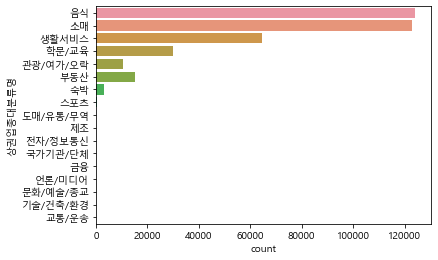

In [ ]:
import seaborn as sns
sns.countplot(data=df_seoul, y="상권업종대분류명")

In [ ]:
df_food = df_seoul.loc[df_seoul['상권업종대분류명'].str.contains('음식')]
df_food.shape

(124001, 39)

<AxesSubplot:xlabel='count', ylabel='상권업종중분류명'>

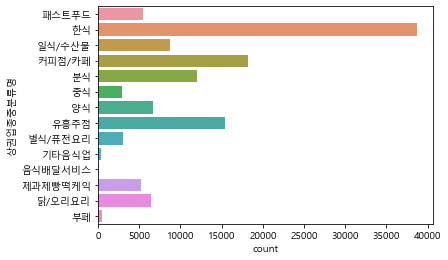

In [ ]:
sns.countplot(data=df_food, y="상권업종중분류명")

# 스타벅스는 맥도날드 입지분석

In [ ]:
df_seoul.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19964615,석봉토스트,NaN,Q,음식,Q07,패스트푸드,Q07A10,토스트전문,I56192,...,1.121510e+24,NaN,"서울특별시 광진구 자양로39길 20, (구의동)",143200,4992.0,NaN,1,NaN,127.088387,37.549245
1,19977290,피자마루,약수점,Q,음식,Q07,패스트푸드,Q07A01,피자전문,I56192,...,1.114016e+24,현진빌딩,"서울특별시 중구 동호로7길 37, (신당동)",100450,4596.0,NaN,1,NaN,127.010861,37.552153
2,19979960,홍능갈비,NaN,Q,음식,Q01,한식,Q01A02,갈비/삼겹살,I56111,...,1.150010e+24,NaN,"서울특별시 강서구 화곡로18길 31, (화곡동)",157010,7718.0,NaN,1,NaN,126.836078,37.538927
3,19983535,초밥왕,NaN,Q,음식,Q03,일식/수산물,Q03A03,음식점-초밥전문,I56113,...,1.171010e+24,현대타워아파트,"서울특별시 송파구 올림픽로 293-19, (신천동, 현대타워아파트)",138735,5510.0,NaN,1,NaN,127.102490,37.515149
4,19969945,에브리돈,북가좌점,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,1.141012e+24,NaN,"서울특별시 서대문구 응암로 65, (북가좌동)",120130,3681.0,NaN,1,NaN,126.910288,37.579029


In [ ]:
df_location = df_seoul[:, '상호명' ].copy()
df_location

SyntaxError: invalid syntax (<ipython-input-51-7b9f0d450e2f>, line 2)

In [ ]:
df_seoul[df_seoul['상호명'].str.contains('스타벅스|맥도날드', regex=True)].shape

ValueError: Cannot mask with non-boolean array containing NA / NaN values

In [ ]:
df_fastfood = df_seoul.loc[
    df_seoul['상호명'].str.contains('스타벅스|맥도날드')
].copy()
# 파스쿠찌 상호명에 파리크라상이 들어가기 때문에 파스쿠찌는 제외합니다.
df_bread.shape

ValueError: Cannot mask with non-boolean array containing NA / NaN values